In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
from math import pi

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [4]:
n = 4
grover_circuit = QuantumCircuit(n)

# Oracle begin.

In [5]:
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

In [6]:
grover_circuit.x(0)
grover_circuit.x(2)
grover_circuit.x(3)
grover_circuit.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤└───┘
q_1: ┤ H ├─────
     ├───┤┌───┐
q_2: ┤ H ├┤ X ├
     ├───┤├───┤
q_3: ┤ H ├┤ X ├
     └───┘└───┘

## cccZ begin.

In [7]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.cu1(pi/4, 0, 3)
grover_circuit.cx(0, 1)
grover_circuit.cu1(-pi/4, 1, 3)
grover_circuit.cx(0, 1)
grover_circuit.cu1(pi/4, 1, 3)
grover_circuit.cx(1, 2)
grover_circuit.cu1(-pi/4, 2, 3)
grover_circuit.cx(0, 2)
grover_circuit.cu1(pi/4, 2, 3)
grover_circuit.cx(1, 2)
grover_circuit.cu1(-pi/4, 2, 3)
grover_circuit.cx(0, 2)
grover_circuit.cu1(pi/4, 2, 3)
grover_circuit.draw()

<ipython-input-7-b540a21ce452>:2: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  grover_circuit.cu1(pi/4, 0, 3)


┌───┐┌───┐ ░                                                          »
q_0: ┤ H ├┤ X ├─░──■──────────■───────────────■────────────────────────────»
     ├───┤└───┘ ░  │        ┌─┴─┐           ┌─┴─┐                          »
q_1: ┤ H ├──────░──┼────────┤ X ├─■─────────┤ X ├─■──────────■─────────────»
     ├───┤┌───┐ ░  │        └───┘ │         └───┘ │        ┌─┴─┐           »
q_2: ┤ H ├┤ X ├─░──┼──────────────┼───────────────┼────────┤ X ├─■─────────»
     ├───┤├───┤ ░  │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) »
q_3: ┤ H ├┤ X ├─░──■──────────────■───────────────■──────────────■─────────»
     └───┘└───┘ ░                                                          »
«                                                   
«q_0: ──■──────────────────────────────■────────────
«       │                              │            
«q_1: ──┼──────────────■───────────────┼────────────
«     ┌─┴─┐          ┌─┴─┐           ┌─┴─┐          
«q_2: ┤ X ├─■────────┤ X ├─■─────────┤ X ├─■────────
«     └───┘ │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4) 
«q_3: ──────■──────────────■───────────────■────────
«

## ccZ end

In [8]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.x(0)
grover_circuit.x(2)
grover_circuit.x(3)
grover_circuit.draw()

┌───┐┌───┐ ░                                                          »
q_0: ┤ H ├┤ X ├─░──■──────────■───────────────■────────────────────────────»
     ├───┤└───┘ ░  │        ┌─┴─┐           ┌─┴─┐                          »
q_1: ┤ H ├──────░──┼────────┤ X ├─■─────────┤ X ├─■──────────■─────────────»
     ├───┤┌───┐ ░  │        └───┘ │         └───┘ │        ┌─┴─┐           »
q_2: ┤ H ├┤ X ├─░──┼──────────────┼───────────────┼────────┤ X ├─■─────────»
     ├───┤├───┤ ░  │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) »
q_3: ┤ H ├┤ X ├─░──■──────────────■───────────────■──────────────■─────────»
     └───┘└───┘ ░                                                          »
«                                                    ░ ┌───┐
«q_0: ──■──────────────────────────────■─────────────░─┤ X ├
«       │                              │             ░ └───┘
«q_1: ──┼──────────────■───────────────┼─────────────░──────
«     ┌─┴─┐          ┌─┴─┐           ┌─┴─┐           ░ ┌───┐
«q_2: ┤ X ├─■────────┤ X ├─■─────────┤ X ├─■─────────░─┤ X ├
«     └───┘ │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4)  ░ ├───┤
«q_3: ──────■──────────────■───────────────■─────────░─┤ X ├
«                                                    ░ └───┘

# Oracle End

# Amplification

In [9]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.h(2)
grover_circuit.h(3)
grover_circuit.x(0)
grover_circuit.x(1)
grover_circuit.x(2)
grover_circuit.x(3)
grover_circuit.draw()

┌───┐┌───┐ ░                                                          »
q_0: ┤ H ├┤ X ├─░──■──────────■───────────────■────────────────────────────»
     ├───┤└───┘ ░  │        ┌─┴─┐           ┌─┴─┐                          »
q_1: ┤ H ├──────░──┼────────┤ X ├─■─────────┤ X ├─■──────────■─────────────»
     ├───┤┌───┐ ░  │        └───┘ │         └───┘ │        ┌─┴─┐           »
q_2: ┤ H ├┤ X ├─░──┼──────────────┼───────────────┼────────┤ X ├─■─────────»
     ├───┤├───┤ ░  │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) »
q_3: ┤ H ├┤ X ├─░──■──────────────■───────────────■──────────────■─────────»
     └───┘└───┘ ░                                                          »
«                                                    ░ ┌───┐ ░ ┌───┐┌───┐
«q_0: ──■──────────────────────────────■─────────────░─┤ X ├─░─┤ H ├┤ X ├
«       │                              │             ░ └───┘ ░ ├───┤├───┤
«q_1: ──┼──────────────■───────────────┼─────────────░───────░─┤ H ├┤ X ├
«     ┌─┴─┐          ┌─┴─┐           ┌─┴─┐           ░ ┌───┐ ░ ├───┤├───┤
«q_2: ┤ X ├─■────────┤ X ├─■─────────┤ X ├─■─────────░─┤ X ├─░─┤ H ├┤ X ├
«     └───┘ │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4)  ░ ├───┤ ░ ├───┤├───┤
«q_3: ──────■──────────────■───────────────■─────────░─┤ X ├─░─┤ H ├┤ X ├
«                                                    ░ └───┘ ░ └───┘└───┘

## Another cccZ

In [10]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.cu1(pi/4, 0, 3)
grover_circuit.cx(0, 1)
grover_circuit.cu1(-pi/4, 1, 3)
grover_circuit.cx(0, 1)
grover_circuit.cu1(pi/4, 1, 3)
grover_circuit.cx(1, 2)
grover_circuit.cu1(-pi/4, 2, 3)
grover_circuit.cx(0, 2)
grover_circuit.cu1(pi/4, 2, 3)
grover_circuit.cx(1, 2)
grover_circuit.cu1(-pi/4, 2, 3)
grover_circuit.cx(0, 2)
grover_circuit.cu1(pi/4, 2, 3)
grover_circuit.draw()

┌───┐┌───┐ ░                                                          »
q_0: ┤ H ├┤ X ├─░──■──────────■───────────────■────────────────────────────»
     ├───┤└───┘ ░  │        ┌─┴─┐           ┌─┴─┐                          »
q_1: ┤ H ├──────░──┼────────┤ X ├─■─────────┤ X ├─■──────────■─────────────»
     ├───┤┌───┐ ░  │        └───┘ │         └───┘ │        ┌─┴─┐           »
q_2: ┤ H ├┤ X ├─░──┼──────────────┼───────────────┼────────┤ X ├─■─────────»
     ├───┤├───┤ ░  │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) »
q_3: ┤ H ├┤ X ├─░──■──────────────■───────────────■──────────────■─────────»
     └───┘└───┘ ░                                                          »
«                                                    ░ ┌───┐ ░ ┌───┐┌───┐ ░ »
«q_0: ──■──────────────────────────────■─────────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«       │                              │             ░ └───┘ ░ ├───┤├───┤ ░ »
«q_1: ──┼──────────────■───────────────┼─────────────░───────░─┤ H ├┤ X ├─░─»
«     ┌─┴─┐          ┌─┴─┐           ┌─┴─┐           ░ ┌───┐ ░ ├───┤├───┤ ░ »
«q_2: ┤ X ├─■────────┤ X ├─■─────────┤ X ├─■─────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«     └───┘ │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4)  ░ ├───┤ ░ ├───┤├───┤ ░ »
«q_3: ──────■──────────────■───────────────■─────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«                                                    ░ └───┘ ░ └───┘└───┘ ░ »
«                                                                             »
«q_0: ─■──────────■───────────────■──────────────────────────────■────────────»
«      │        ┌─┴─┐           ┌─┴─┐                            │            »
«q_1: ─┼────────┤ X ├─■─────────┤ X ├─■──────────■───────────────┼────────────»
«      │        └───┘ │         └───┘ │        ┌─┴─┐           ┌─┴─┐          »
«q_2: ─┼──────────────┼───────────────┼────────┤ X ├─■─────────┤ X ├─■────────»
«      │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4) »
«q_3: ─■──────────────■───────────────■──────────────■───────────────■────────»
«                                                                             »
«                                    
«q_0: ──────────────────■────────────
«                       │            
«q_1: ──■───────────────┼────────────
«     ┌─┴─┐           ┌─┴─┐          
«q_2: ┤ X ├─■─────────┤ X ├─■────────
«     └───┘ │U1(-π/4) └───┘ │U1(π/4) 
«q_3: ──────■───────────────■────────
«

## End cccZ

In [11]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.x(0)
grover_circuit.x(1)
grover_circuit.x(2)
grover_circuit.x(3)
grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.h(2)
grover_circuit.h(3)
grover_circuit.draw()

┌───┐┌───┐ ░                                                          »
q_0: ┤ H ├┤ X ├─░──■──────────■───────────────■────────────────────────────»
     ├───┤└───┘ ░  │        ┌─┴─┐           ┌─┴─┐                          »
q_1: ┤ H ├──────░──┼────────┤ X ├─■─────────┤ X ├─■──────────■─────────────»
     ├───┤┌───┐ ░  │        └───┘ │         └───┘ │        ┌─┴─┐           »
q_2: ┤ H ├┤ X ├─░──┼──────────────┼───────────────┼────────┤ X ├─■─────────»
     ├───┤├───┤ ░  │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) »
q_3: ┤ H ├┤ X ├─░──■──────────────■───────────────■──────────────■─────────»
     └───┘└───┘ ░                                                          »
«                                                    ░ ┌───┐ ░ ┌───┐┌───┐ ░ »
«q_0: ──■──────────────────────────────■─────────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«       │                              │             ░ └───┘ ░ ├───┤├───┤ ░ »
«q_1: ──┼──────────────■───────────────┼─────────────░───────░─┤ H ├┤ X ├─░─»
«     ┌─┴─┐          ┌─┴─┐           ┌─┴─┐           ░ ┌───┐ ░ ├───┤├───┤ ░ »
«q_2: ┤ X ├─■────────┤ X ├─■─────────┤ X ├─■─────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«     └───┘ │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4)  ░ ├───┤ ░ ├───┤├───┤ ░ »
«q_3: ──────■──────────────■───────────────■─────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«                                                    ░ └───┘ ░ └───┘└───┘ ░ »
«                                                                             »
«q_0: ─■──────────■───────────────■──────────────────────────────■────────────»
«      │        ┌─┴─┐           ┌─┴─┐                            │            »
«q_1: ─┼────────┤ X ├─■─────────┤ X ├─■──────────■───────────────┼────────────»
«      │        └───┘ │         └───┘ │        ┌─┴─┐           ┌─┴─┐          »
«q_2: ─┼──────────────┼───────────────┼────────┤ X ├─■─────────┤ X ├─■────────»
«      │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4) »
«q_3: ─■──────────────■───────────────■──────────────■───────────────■────────»
«                                                                             »
«                                     ░ ┌───┐┌───┐
«q_0: ──────────────────■─────────────░─┤ X ├┤ H ├
«                       │             ░ ├───┤├───┤
«q_1: ──■───────────────┼─────────────░─┤ X ├┤ H ├
«     ┌─┴─┐           ┌─┴─┐           ░ ├───┤├───┤
«q_2: ┤ X ├─■─────────┤ X ├─■─────────░─┤ X ├┤ H ├
«     └───┘ │U1(-π/4) └───┘ │U1(π/4)  ░ ├───┤├───┤
«q_3: ──────■───────────────■─────────░─┤ X ├┤ H ├
«                                     ░ └───┘└───┘

In [12]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
result = sv_sim.run(qobj).result()
statevec = result.get_statevector()

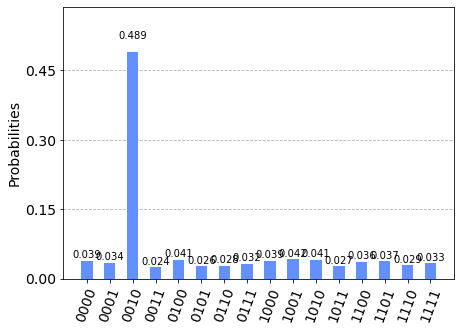

In [13]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)